# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### 1.1 Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
X_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


In [13]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], d

In [15]:
X_test

array([[    30,  87000],
       [    38,  50000],
       [    35,  75000],
       [    30,  79000],
       [    35,  50000],
       [    27,  20000],
       [    31,  15000],
       [    36, 144000],
       [    18,  68000],
       [    47,  43000],
       [    30,  49000],
       [    28,  55000],
       [    37,  55000],
       [    39,  77000],
       [    20,  86000],
       [    32, 117000],
       [    37,  77000],
       [    19,  85000],
       [    55, 130000],
       [    35,  22000],
       [    35,  47000],
       [    47, 144000],
       [    41,  51000],
       [    47, 105000],
       [    23,  28000],
       [    49, 141000],
       [    28,  87000],
       [    29,  80000],
       [    37,  62000],
       [    32,  86000],
       [    21,  88000],
       [    37,  79000],
       [    57,  60000],
       [    37,  53000],
       [    24,  58000],
       [    18,  52000],
       [    22,  81000],
       [    34,  43000],
       [    31,  34000],
       [    49,  36000],


In [17]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

### 1.2 Feature Scaling

Standardizing data using [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is important because many machine learning algorithms perform better or converge faster when features are on a similar scale. This process, which involves scaling features to have zero mean and unit variance, helps in reducing the bias that can be introduced by features with larger scales and improves the overall predictive performance of models, especially those sensitive to feature scaling like Support Vector Machines and k-Nearest Neighbors.


### 1.2.1 Demo 

In [19]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()

In [21]:
print(scaler.fit(data))

StandardScaler()


In [23]:
scaler.transform(data)

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

Z = (x-u) /s , u (mean) = 0.5, s (standard deviation ) = 0.5

Z_new = (2-0.5)/0.5 = 1.5/0.5 = 3

In [26]:
scaler.transform([[2, 2]])

array([[3., 3.]])

### 1.2.2 Back to Training dataset

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage

In [31]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [33]:
X_test.dtype

dtype('float64')

## 2. Training the K-NN model on the Training set

In [35]:
class KNN():
    def __init__(self,k):
        self.k=k
        print('Input k value: ',self.k)
        
    def fit(self,X_train,y_train):
        self.x_train=X_train
        self.y_train=y_train
    
    def calculate_euclidean(self,sample1,sample2):
        distance=0.0
        for i in range(len(sample1)):
            #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
            distance+=(sample1[i]-sample2[i])**2 
        return np.sqrt(distance)

    def nearest_neighbors(self, test_sample):
        distances = []  # List to store distances from the test sample to each training sample

        # Loop over each sample in the training set
        for i in range(len(self.x_train)):
            # Calculate the Euclidean distance from the current training sample to the test sample
            # Append a tuple of (training label, distance) to the distances list
            distances.append((self.y_train[i], self.calculate_euclidean(self.x_train[i], test_sample)))

        # Sort the distances list in ascending order based on the distance
        distances.sort(key=lambda x: x[1])

        neighbors = []  # List to store the nearest neighbors

        # Retrieve the first 'k' nearest neighbors
        for i in range(self.k):
            # Append the label of each neighbor to the neighbors list
            neighbors.append(distances[i][0])

        # Return the list of nearest neighbors
        return neighbors

    def predict(self, test_set):
        predictions = []  # List to store predictions for each test sample

        # Loop over each sample in the test set
        for test_sample in test_set:
            # Find the nearest neighbors for the current test sample
            neighbors = self.nearest_neighbors(test_sample)

            # Extract the labels of the nearest neighbors
            labels = [sample for sample in neighbors]

            # Determine the most common label among the neighbors
            prediction = max(labels, key=labels.count)

            # Append the predicted label to the predictions list
            predictions.append(prediction)

        # Return the list of predictions for the test set
        return predictions


In [37]:
model=KNN(5) #our model
model.fit(X_train,y_train)

Input k value:  5


### 2.1 Predicting the Test set results

In [39]:
predictions=model.predict(X_test)#our model's predictions

In [41]:
X_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [43]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [45]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1]

## 2.3 Visualising the Test set results and add your name to them

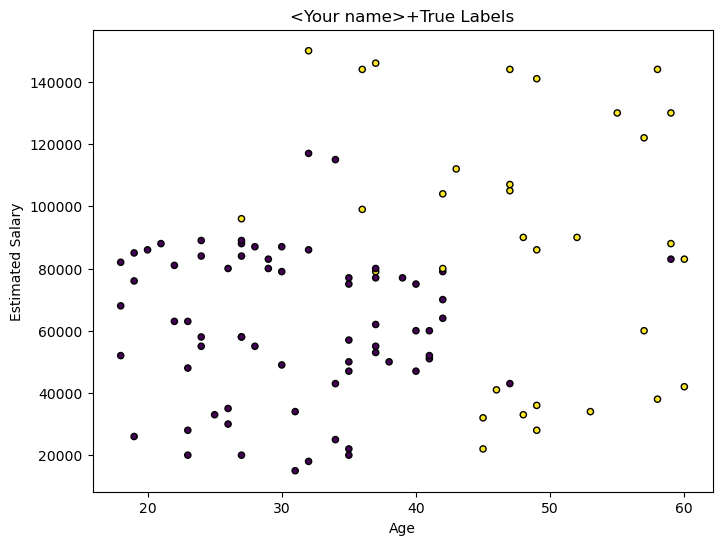

In [47]:

#'sc' is your StandardScaler and 'X_test' is your scaled test dataset
X_set, y_set = sc.inverse_transform(X_test), y_test

# Plotting the results
plt.figure(figsize=(8, 6))

# Plot True labels
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=20)
plt.title("<Your name>+True Labels")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

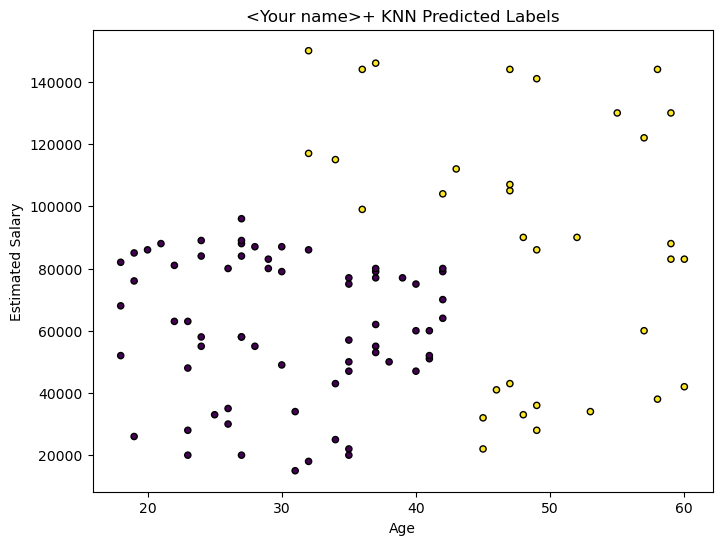

In [49]:


#'sc' is your StandardScaler and 'X_test' is your scaled test dataset
X_set, y_set = sc.inverse_transform(X_test), predictions

# Plotting the results
plt.figure(figsize=(8, 6))

# Plot True labels using original values
plt.scatter(X_set[:, 0], X_set[:, 1], c=predictions, cmap='viridis', edgecolor='k', s=20)
plt.title("<Your name>+ KNN Predicted Labels")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()


## 3. The scikit-learn approach

In [55]:
from sklearn.neighbors import KNeighborsClassifier


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Initialize the KNN classifier with k=5

knn = KNeighborsClassifier(n_neighbors=5) #your code

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

### Please visualize the results and add your name to them

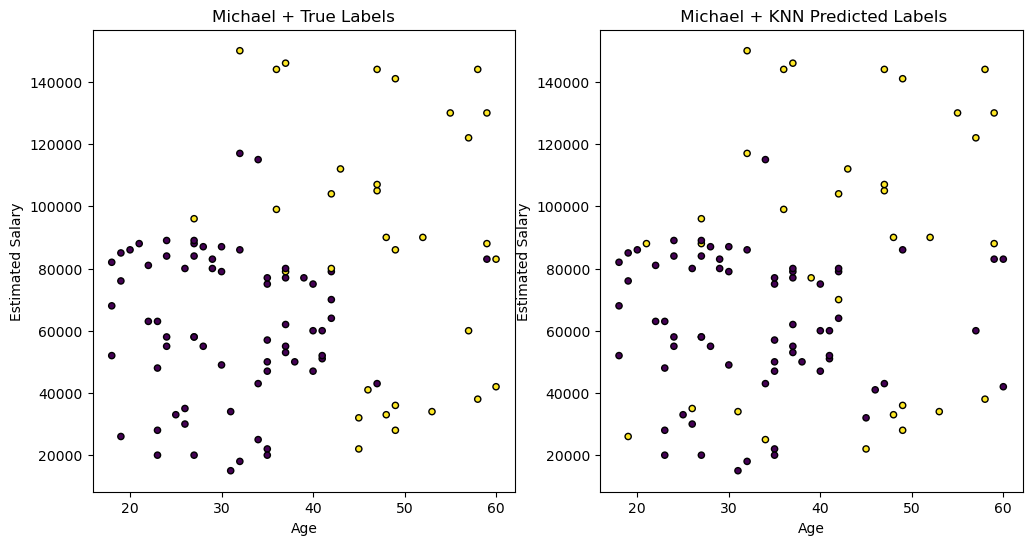

In [59]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot true labels
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=20)
plt.title("Michael + True Labels")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Plot predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=20)
plt.title(" Michael + KNN Predicted Labels")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.show()


# 🤝 Practice Lab: K-Nearest Neighbors (KNN)

### 🧠 Objective
In this exercise, you will:
1. Build a simple KNN classifier.  
2. Predict class labels for new data points.  
3. Visualize decision boundaries and understand the role of **K**.  

---
## 🧩 Scenario

A teacher collected data about students’ **study hours** and **sleep hours**, along with whether they **passed** an exam.

| Student | Study_Hours | Sleep_Hours | Pass |
|----------|--------------|-------------|------|
| A | 2 | 9 | No |
| B | 3 | 8 | No |
| C | 4 | 7 | No |
| D | 6 | 6 | Yes |
| E | 7 | 5 | Yes |
| F | 8 | 4 | Yes |
| G | 9 | 3 | Yes |

You will use KNN to predict whether a new student is likely to **pass** based on their study and sleep hours.

---
## 🧠 Task Requirements

1. Create a small dataset as a pandas DataFrame.  
2. Split it into features (`Study_Hours`, `Sleep_Hours`) and labels (`Pass`).  
3. Train a **KNN classifier** using `KNeighborsClassifier` from scikit-learn.  
4. Predict the outcome for a new student (e.g., `Study_Hours=5`, `Sleep_Hours=6`).  
5. Try different values of **K** (e.g., 1, 3, 5) and compare results.  
6. Visualize the data points with color-coded classes.

---


In [61]:
 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
 
data = {
    'Study_Hours': [2,3,4,6,7,8,9],
    'Sleep_Hours': [9,8,7,6,5,4,3],
    'Pass': ['No','No','No','Yes','Yes','Yes','Yes']
}

df = pd.DataFrame(data)
df

,Study_Hours,Sleep_Hours,Pass
0,2,9,No
1,3,8,No
2,4,7,No
3,6,6,Yes
4,7,5,Yes
5,8,4,Yes
6,9,3,Yes


### Split into features x and y then train KNN Classifier 

In [72]:
X = df[['Study_Hours', 'Sleep_Hours']] #features 
y = df['Pass'] #labels

#initialize knn with k = 3 
knn = KNeighborsClassifier(n_neighbors=3)

#train model
knn.fit(X,y)

#predict for new student
new_student = [[5,6]] #Study_Hours = 5, Sleep_Hours = 6
prediction  = knn.predict(new_student)


D:\Anaconda_Python_CS\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Try different K values

In [74]:
for k in [1,3,5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(new_student)
    print(f"k = {k} Predicted result: {pred[0]}")
    

k = 1 Predicted result: Yes
k = 3 Predicted result: Yes
k = 5 Predicted result: Yes


D:\Anaconda_Python_CS\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda_Python_CS\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda_Python_CS\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Visualize Data

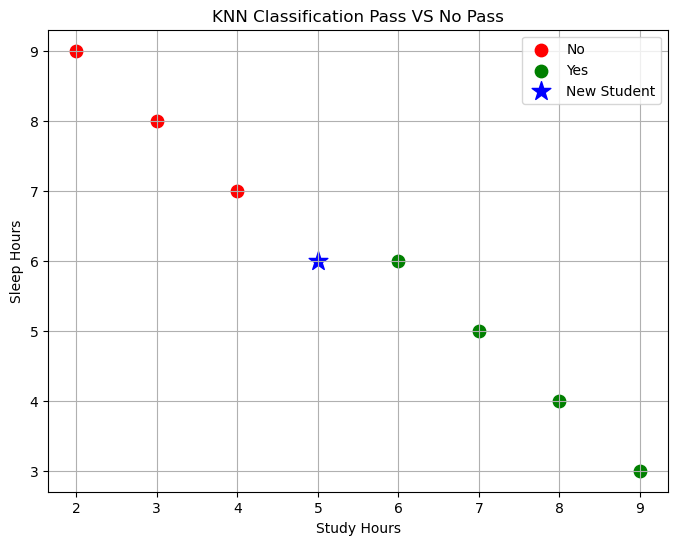

In [78]:
import numpy as np 
#plot data points
colors = {'Yes': 'green', 'No': 'red'}
plt.figure(figsize =(8,6))
for label in y.unique():
    subset = df[df['Pass'] == label]
    plt.scatter(subset['Study_Hours'],subset['Sleep_Hours'],
                color = colors[label],label = label, s = 80)

#plot new student
plt.scatter(5,6,color= 'blue', marker = '*', s = 200, label = 'New Student')

plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours') 
plt.title('KNN Classification Pass VS No Pass')
plt.legend()
plt.grid(True)
plt.show()